In [1]:
# Time Series Analysis + Prophet + ARIMA + SARIMA
# M01AB e M01AE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller, kpss    ##### unit root test
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm 
import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import itertools
import statsmodels.api as sm

In [2]:
# read dataset
dataSales = pd.read_csv('salesdaily.csv', sep=',')
dataSales.head(5)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [3]:
# verify types of datum
type(dataSales.loc[0,'datum'])

str

In [4]:
# pass string to datetime
dataSales['datum'] = [datetime.datetime.strptime(x, "%m/%d/%Y") for x in dataSales['datum']]
type(dataSales.loc[0,'datum'])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
dataSales.head(5)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [6]:
# set date to index
dataSales.rename(columns={'datum':'date'}, inplace=True)
dataSales.set_index('date', inplace=True)
dataSales.head(5)

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
date,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [7]:
# select components M01AB and M01AE
dataM = dataSales[['M01AB', 'M01AE']]
dataM.head()

,M01AB,M01AE
date,,
2014-01-02,0.0,3.67
2014-01-03,8.0,4.00
2014-01-04,2.0,1.00
2014-01-05,4.0,3.00
2014-01-06,5.0,1.00


In [8]:
# split timeseries
m01ab = dataM[['M01AB']]
m01ae = dataM[['M01AE']]

print('Size\nM01AB: {} | M01AE: {}'.format(m01ab.shape, m01ae.shape))

Size
M01AB: (2106, 1) | M01AE: (2106, 1)


# Time Series Analysis

<Figure size 432x288 with 0 Axes>

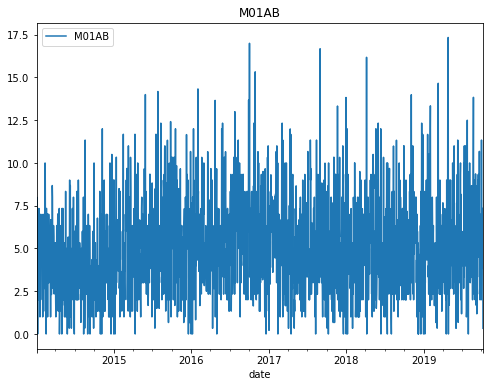

In [9]:
# M01AB
plt.figure()
m01ab.plot(figsize=(8, 6))
plt.title('M01AB')
plt.show()

Text(0.5, 1.0, 'Log Histogram')

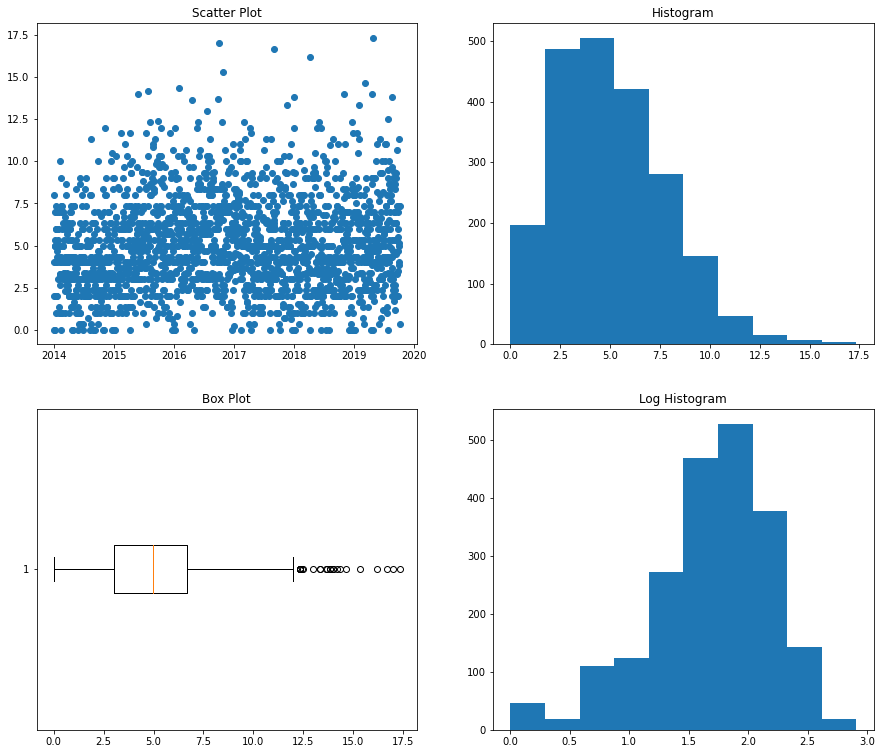

In [10]:
# Descriptive Analytics / graphs
fig, ax = plt.subplots(2, 2, figsize=(15, 13))
ax[0,0].scatter(y=m01ab, x=m01ab.index)
ax[0,0].set_title('Scatter Plot')
ax[0,1].hist(m01ab['M01AB'])
ax[0,1].set_title('Histogram')
ax[1,0].boxplot(m01ab['M01AB'], vert=False)
ax[1,0].set_title('Box Plot')
ax[1,1].hist(np.log(m01ab['M01AB'] + 1))
ax[1,1].set_title('Log Histogram')

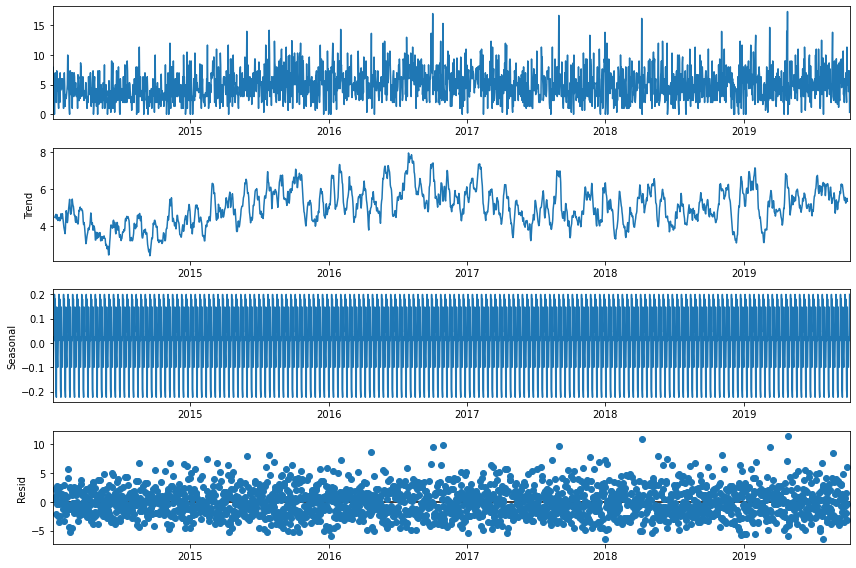

In [11]:
# seazonal decomposition
plt.rcParams['figure.figsize'] = (12.0, 8.0)
decomp = seasonal_decompose(m01ab, model='aditive',period=12)
decomp.plot()
plt.show()

In [12]:
# evaluate series stationarity - unit root and stationarity tests
test1_adf = adfuller(m01ab, regression='c')
test1_kpss = kpss(m01ab, regression='c')
print("ADF p-value = {} | KPSS p-value = {}".format(test1_adf[1],test1_kpss[1]))

# ADF points towards stationarity but KPSS points towards unit root --> inconclusive

ADF p-value = 4.563943367500864e-13 | KPSS p-value = 0.01


C:\Users\fmalt\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\fmalt\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


[]

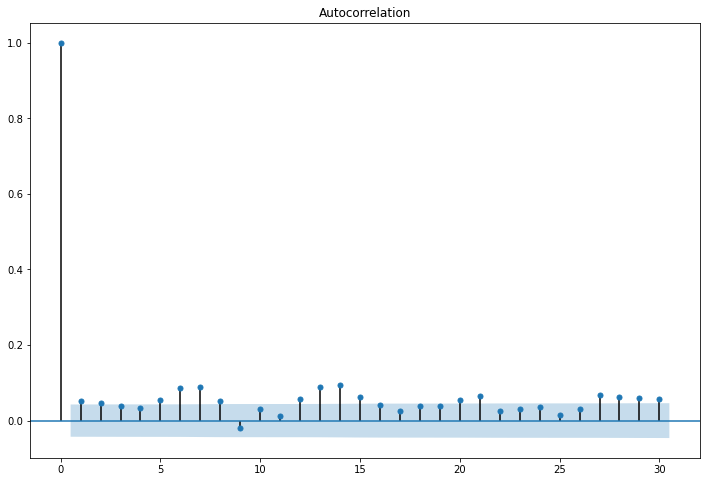

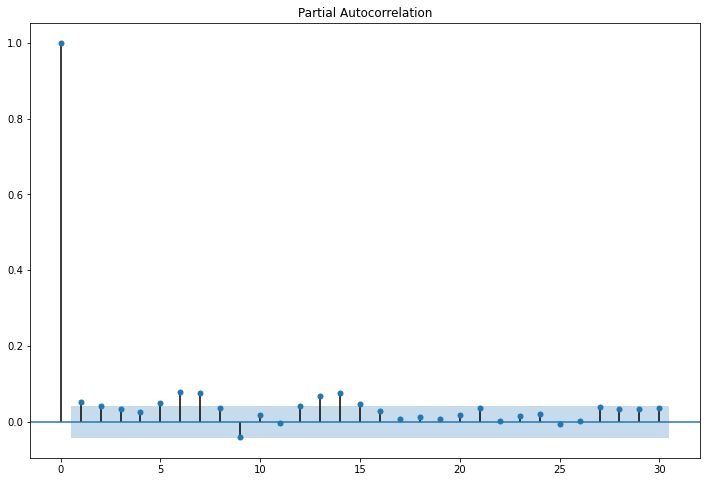

In [13]:
# correlogram
plot_acf(m01ab, lags=30, alpha=0.05)
plot_pacf(m01ab, lags=30, alpha=0.05)
plt.plot()

In [14]:
# we had inconclusive stationarity test: ADF said that serie is stationary and KPSS stated the opposite
# timeseries has positive skewness
# create difference of the logarithm of original value
difflog_m01ab = np.log(m01ab + 1).diff().dropna()
print(difflog_m01ab.shape)
difflog_m01ab.head(5)

(2105, 1)


,M01AB
date,
2014-01-03,2.197225
2014-01-04,-1.098612
2014-01-05,0.510826
2014-01-06,0.182322
2014-01-07,-1.791759


<Figure size 864x576 with 0 Axes>

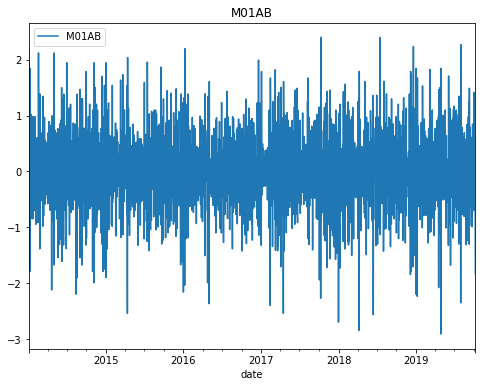

In [15]:
plt.figure()
difflog_m01ab.plot(figsize=(8, 6))
plt.title('M01AB')
plt.show()

Text(0.5, 1.0, 'Box Plot - Diff Log M01AB')

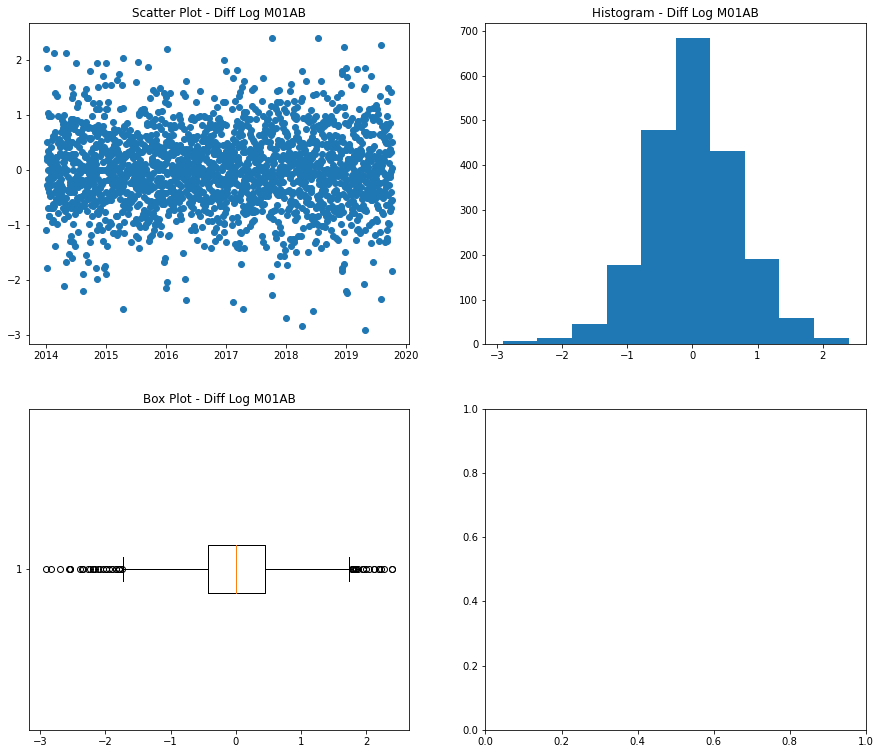

In [16]:
# descriptive analytics / graphs in the transformed series
fig, ax = plt.subplots(2, 2, figsize=(15, 13))
ax[0,0].scatter(y=difflog_m01ab, x=difflog_m01ab.index)
ax[0,0].set_title('Scatter Plot - Diff Log M01AB')
ax[0,1].hist(difflog_m01ab['M01AB'])
ax[0,1].set_title('Histogram - Diff Log M01AB')
ax[1,0].boxplot(difflog_m01ab['M01AB'], vert=False)
ax[1,0].set_title('Box Plot - Diff Log M01AB')

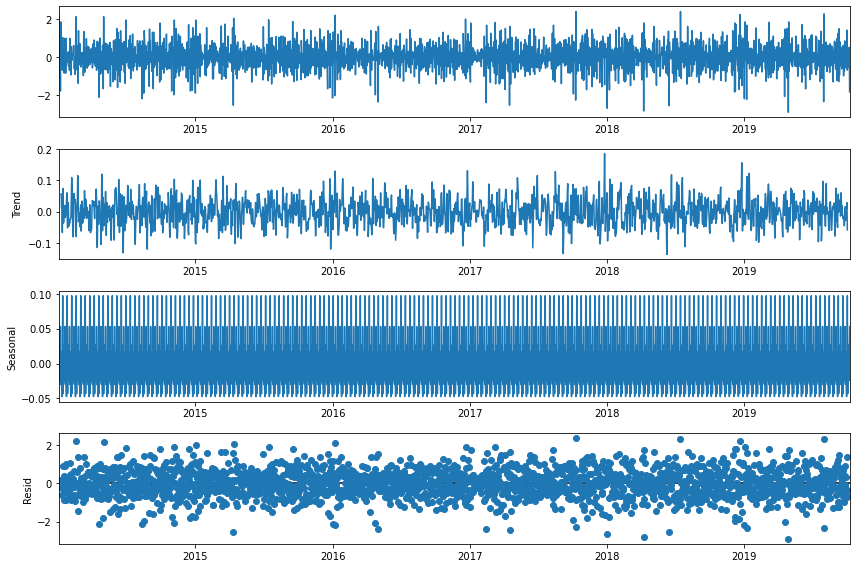

In [17]:
# transformed series seazonal decomposition
plt.rcParams['figure.figsize'] = (12.0, 8.0)
decomp2 = seasonal_decompose(difflog_m01ab, model='aditive',period=12)
decomp2.plot()
plt.show()

In [18]:
# evaluate series stationarity - unit root and stationarity test
test2_adf = adfuller(difflog_m01ab, regression='c')
test2_kpss = kpss(difflog_m01ab, regression='c')
print("ADF p-value = {} | KPSS p-value = {}".format(test2_adf[1],test2_kpss[1]))

# both tests confirm stationarity of the transformed time series

ADF p-value = 5.261994958984722e-27 | KPSS p-value = 0.1


C:\Users\fmalt\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\fmalt\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


[]

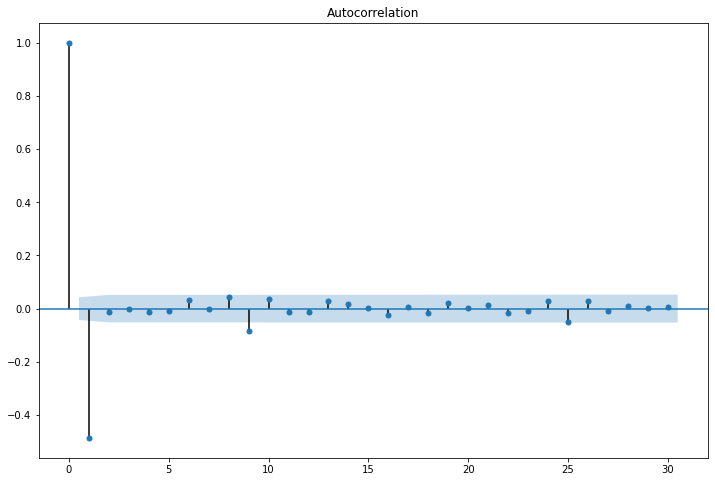

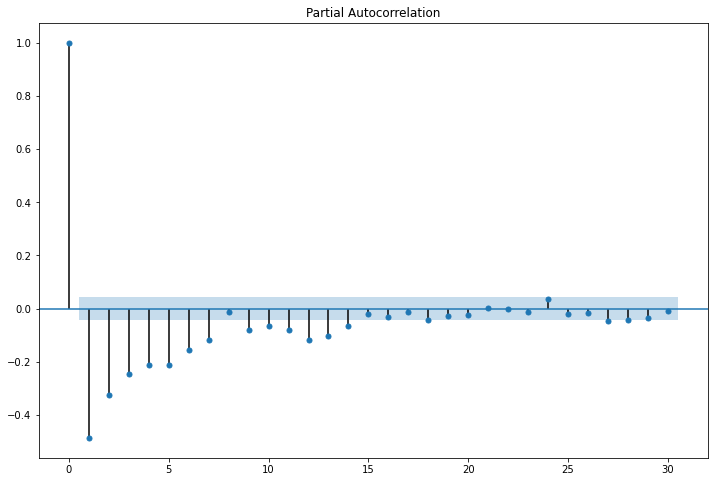

In [19]:
# correlogram
plot_acf(difflog_m01ab, lags=30, alpha=0.05)
plot_pacf(difflog_m01ab, lags=30, alpha=0.05)
plt.plot()

In [20]:
# Resumindo:
# A variável M01AB não é estacionária em nível e apresenta enviesamento positivo.
# Esta fica estacionária na sua primeira diferença
# Vai-se usar o logaritmo da primeira diferença desta variável para os modelos de previsão 

<Figure size 864x576 with 0 Axes>

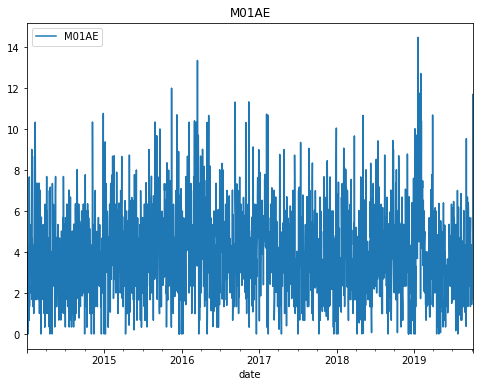

In [21]:
# M01AE
plt.figure()
m01ae.plot(figsize=(8, 6))
plt.title('M01AE')
plt.show()

Text(0.5, 1.0, 'Log Histogram')

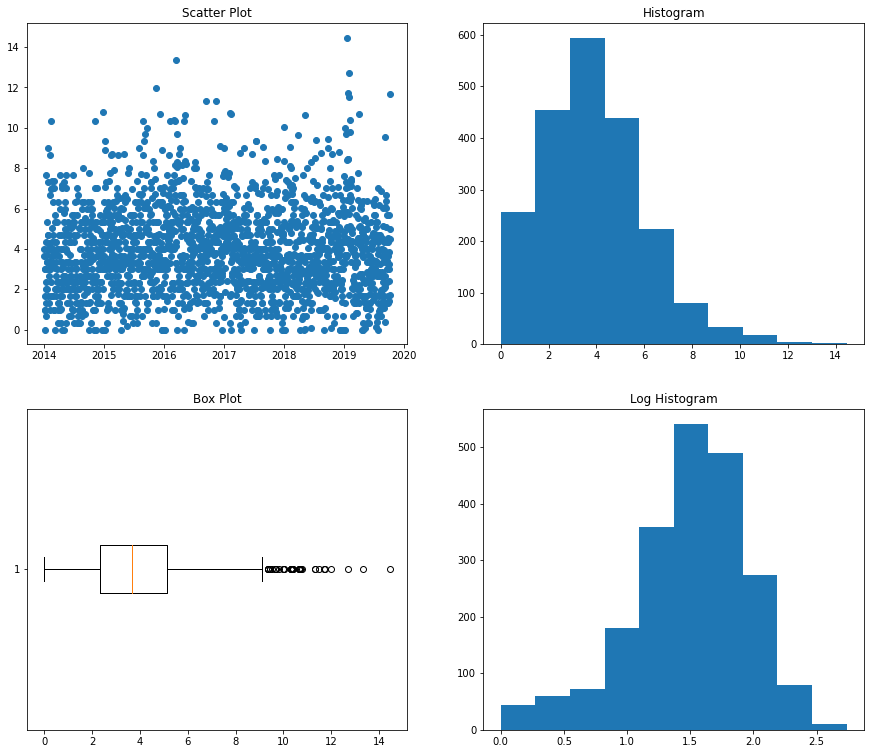

In [22]:
# Descriptive analytics / graphs
fig, ax = plt.subplots(2, 2, figsize=(15, 13))
ax[0,0].scatter(y=m01ae, x=m01ae.index)
ax[0,0].set_title('Scatter Plot')
ax[0,1].hist(m01ae['M01AE'])
ax[0,1].set_title('Histogram')
ax[1,0].boxplot(m01ae['M01AE'], vert=False)
ax[1,0].set_title('Box Plot')
ax[1,1].hist(np.log(m01ae['M01AE'] + 1))
ax[1,1].set_title('Log Histogram')

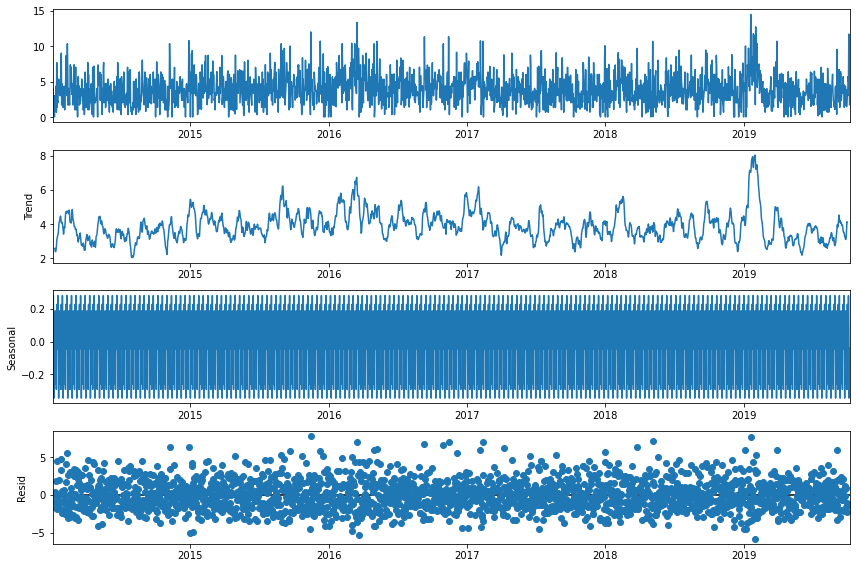

In [23]:
# seazonal decomposition
plt.rcParams['figure.figsize'] = (12.0, 8.0)
decomp3 = seasonal_decompose(m01ae, model='aditive',period=12)
decomp3.plot()
plt.show()

In [24]:
# evaluate series stationarity - unit root and stationarity tests
test3_adf = adfuller(m01ae, regression='c')
test3_kpss = kpss(m01ae, regression='c') # stationarity around a constant
print("ADF p-value = {} | KPSS p-value = {}".format(test3_adf[1],test3_kpss[1]))

# both tests confirm a stationary time series

ADF p-value = 5.008856420707984e-11 | KPSS p-value = 0.1


C:\Users\fmalt\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\fmalt\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


[]

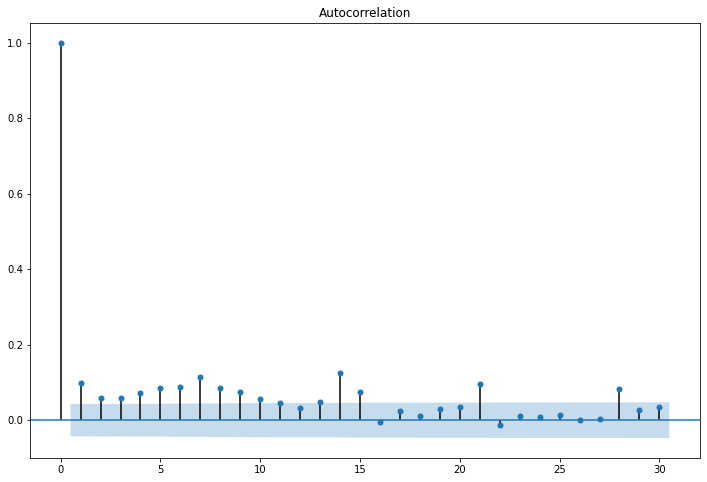

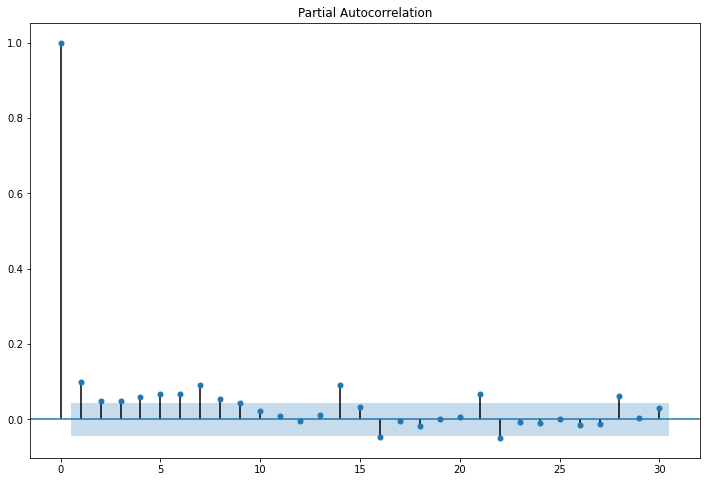

In [25]:
# correlogram
plot_acf(m01ae, lags=30, alpha=0.05)
plot_pacf(m01ae, lags=30, alpha=0.05)
plt.plot()

In [26]:
# stationarity test points towards the series being stationary, but it still shows positive skewness
# create logarithm of the variable
log_m01ae = np.log(m01ae + 1)
print(log_m01ae.shape)
log_m01ae.head(5)

(2106, 1)


,M01AE
date,
2014-01-02,1.541159
2014-01-03,1.609438
2014-01-04,0.693147
2014-01-05,1.386294
2014-01-06,0.693147


<Figure size 864x576 with 0 Axes>

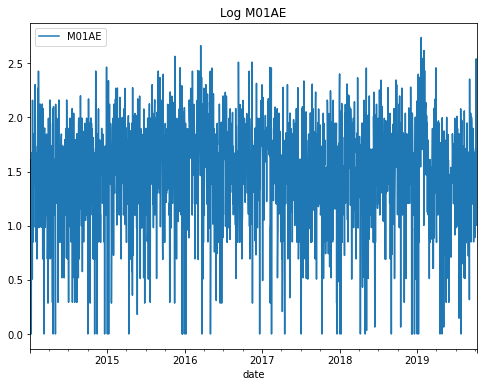

In [27]:
plt.figure()
log_m01ae.plot(figsize=(8, 6))
plt.title('Log M01AE')
plt.show()

Text(0.5, 1.0, 'Box Plot')

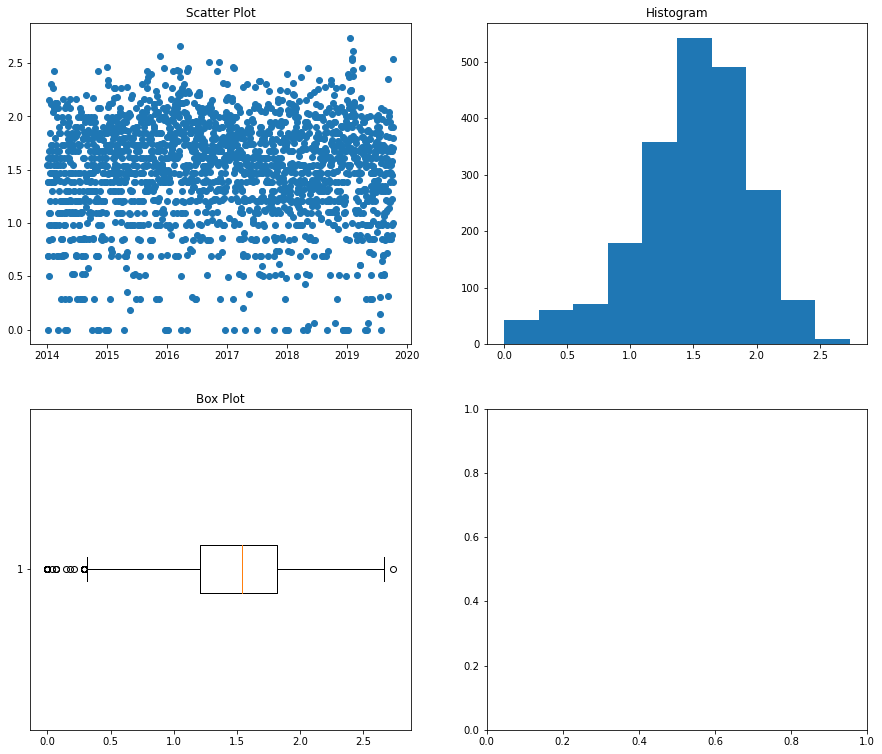

In [28]:
# descriptive analytics / graphs
fig, ax = plt.subplots(2, 2, figsize=(15, 13))
ax[0,0].scatter(y=log_m01ae, x=log_m01ae.index)
ax[0,0].set_title('Scatter Plot')
ax[0,1].hist(log_m01ae['M01AE'])
ax[0,1].set_title('Histogram')
ax[1,0].boxplot(log_m01ae['M01AE'], vert=False)
ax[1,0].set_title('Box Plot')

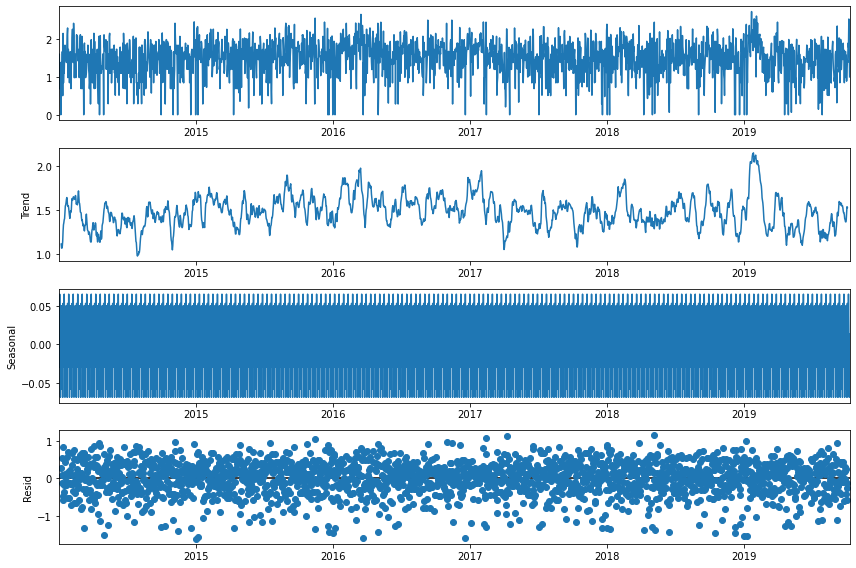

In [29]:
# seazonal decomposition
plt.rcParams['figure.figsize'] = (12.0, 8.0)
decomp4 = seasonal_decompose(log_m01ae, model='aditive',period=12)
decomp4.plot()
plt.show()

In [30]:
# evaluate series stationarity - unit root and stationarity tests
test4_adf = adfuller(log_m01ae, regression='c')
test4_kpss = kpss(log_m01ae, regression='c') # stationarity around a constant
print("ADF p-value = {} | KPSS p-value = {}".format(test4_adf[1],test4_kpss[1]))

# both tests confirm a stationary time series

ADF p-value = 3.563445402107475e-11 | KPSS p-value = 0.1


C:\Users\fmalt\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\fmalt\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


[]

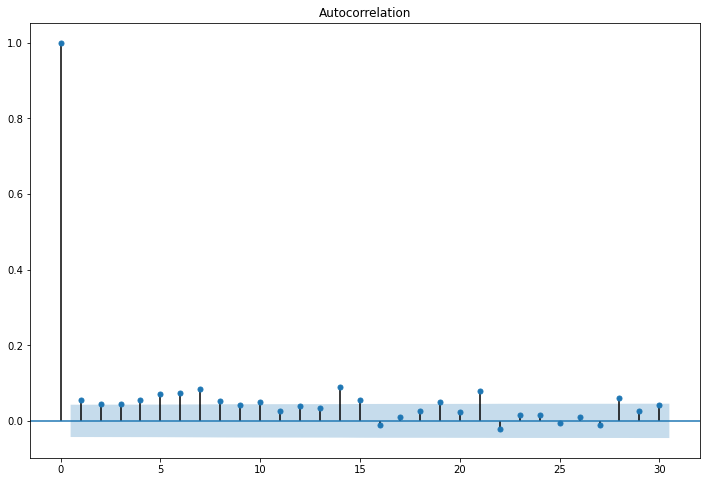

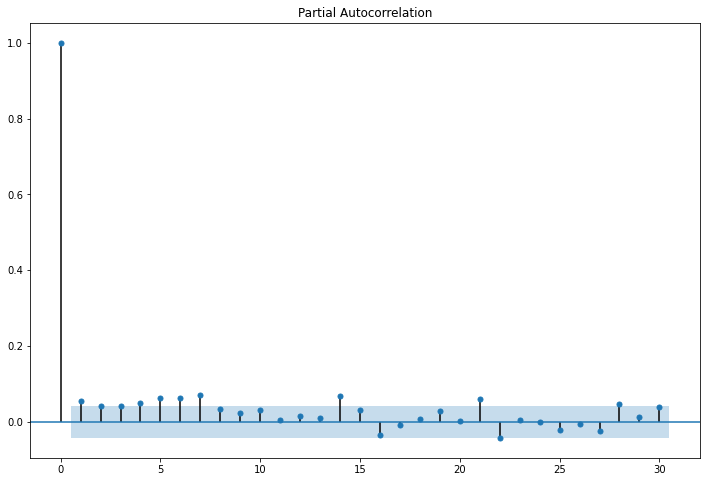

In [31]:
# correlogram
plot_acf(log_m01ae, lags=30, alpha=0.05)
plot_pacf(log_m01ae, lags=30, alpha=0.05)
plt.plot()

In [32]:
# M01AE is stationary in level and has positive skewness
# The logarithm of this variable will be used in the training of forecasting models

## Summary
- M01AB is stationary in the first difference and has positive skewness
- M01AE is stationary in level and has positive skewness

### Next
- Creation of baseline model - **Prophet**

In [33]:
# M01AB
from fbprophet import Prophet

In [34]:
m01ab.head(5)

,M01AB
date,
2014-01-02,0.0
2014-01-03,8.0
2014-01-04,2.0
2014-01-05,4.0
2014-01-06,5.0


In [35]:
# rename columns according to Prophet input needs
m01ab_fb = m01ab.reset_index().rename(columns={'date':'ds', 'M01AB':'y'})
m01ab_fb.head(5)

,ds,y
0,2014-01-02,0.0
1,2014-01-03,8.0
2,2014-01-04,2.0
3,2014-01-05,4.0
4,2014-01-06,5.0


In [36]:
# train - test split
split_index = int(len(m01ab_fb)*0.8)
m01ab_fb_train = m01ab_fb.iloc[:split_index,:]
m01ab_fb_test = m01ab_fb.iloc[split_index:,:]
print('Train: {} | Test: {}'.format(m01ab_fb_train.shape, m01ab_fb_test.shape))

Train: (1684, 2) | Test: (422, 2)


In [37]:
# define a new Prophet object and fit to the data
model_m01ab_fb = Prophet()
model_m01ab_fb.fit(m01ab_fb_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
# make future predictions (out-of-sample): 422 time-periods allocation
baseline_pred = model_m01ab_fb.make_future_dataframe(periods=422, freq = 'd')
baseline_pred.tail()

,ds
2101,2019-10-04
2102,2019-10-05
2103,2019-10-06
2104,2019-10-07
2105,2019-10-08


In [39]:
# predict
baseline_prediction = model_m01ab_fb.predict(baseline_pred)

In [40]:
baseline_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2101,2019-10-04,4.142621,0.908838,7.573972,3.968668,4.293147,0.030251,0.030251,0.030251,-0.246865,-0.246865,-0.246865,0.277116,0.277116,0.277116,0.0,0.0,0.0,4.172872
2102,2019-10-05,4.141316,1.452830,8.422764,3.966706,4.292257,0.921971,0.921971,0.921971,0.637158,0.637158,0.637158,0.284813,0.284813,0.284813,0.0,0.0,0.0,5.063287
2103,2019-10-06,4.140011,1.203320,7.880609,3.964856,4.291366,0.427624,0.427624,0.427624,0.144579,0.144579,0.144579,0.283045,0.283045,0.283045,0.0,0.0,0.0,4.567635
2104,2019-10-07,4.138706,1.054171,7.554992,3.963006,4.290475,0.307400,0.307400,0.307400,0.035509,0.035509,0.035509,0.271891,0.271891,0.271891,0.0,0.0,0.0,4.446106
2105,2019-10-08,4.137402,0.986428,7.660962,3.960973,4.289641,0.340668,0.340668,0.340668,0.088996,0.088996,0.088996,0.251672,0.251672,0.251672,0.0,0.0,0.0,4.478070


In [41]:
baseline_prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2101,2019-10-04,4.172872,0.908838,7.573972
2102,2019-10-05,5.063287,1.452830,8.422764
2103,2019-10-06,4.567635,1.203320,7.880609
2104,2019-10-07,4.446106,1.054171,7.554992
2105,2019-10-08,4.478070,0.986428,7.660962


[]

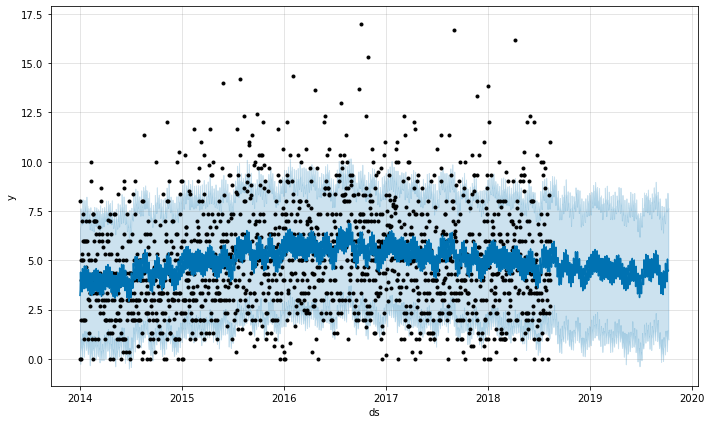

In [42]:
# plot prediction
model_m01ab_fb.plot(baseline_prediction)
plt.plot()

In [43]:
m01ab_fb.set_index('ds', inplace=True)
baseline_prediction.set_index('ds', inplace=True)

In [44]:
viz_df1 = m01ab_fb.join(baseline_prediction[['yhat', 'yhat_lower','yhat_upper']], how ='outer')
viz_df1.head()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2014-01-02,0.0,3.224675,-0.009809,6.584609
2014-01-03,8.0,3.491331,-0.246810,6.766486
2014-01-04,2.0,4.399915,1.040296,7.641172
2014-01-05,4.0,3.932311,0.579146,7.337462
2014-01-06,5.0,3.848647,0.488483,7.123352


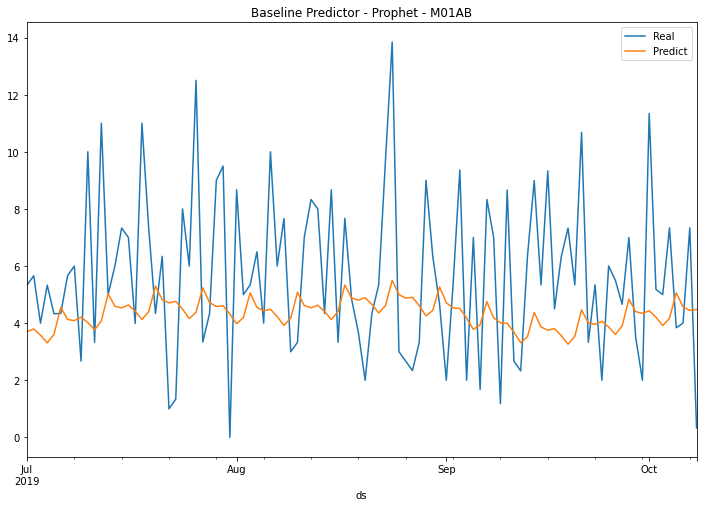

In [45]:
# see last 100 observations 
viz_df1.rename(columns={'y':'Real', 'yhat':'Predict'}, inplace=True)
viz_df1[['Real', 'Predict']].iloc[-100:,:].plot().get_figure()
plt.title('Baseline Predictor - Prophet - M01AB')
plt.show()

In [46]:
# Create dataframe to evaluate the model
comp_baseline1 = m01ab_fb_test.merge(baseline_prediction[['yhat']], how ='left', left_on='ds', right_index=True).set_index('ds')
comp_baseline1.tail(5)

,y,yhat
ds,,
2019-10-04,7.34,4.172872
2019-10-05,3.84,5.063287
2019-10-06,4.00,4.567635
2019-10-07,7.34,4.446106
2019-10-08,0.33,4.478070


In [47]:
print(baseline_prediction[['yhat']].tail())
print(m01ab_fb_test.tail())

                yhat
ds                  
2019-10-04  4.172872
2019-10-05  5.063287
2019-10-06  4.567635
2019-10-07  4.446106
2019-10-08  4.478070
             ds     y
2101 2019-10-04  7.34
2102 2019-10-05  3.84
2103 2019-10-06  4.00
2104 2019-10-07  7.34
2105 2019-10-08  0.33


In [48]:
# Evaluate Model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [49]:
MSE = mean_squared_error(comp_baseline1['y'], comp_baseline1['yhat'], squared=False)
MAE = mean_absolute_error(comp_baseline1['y'], comp_baseline1['yhat'])
MAPE = np.abs(np.mean(((comp_baseline1['yhat']+1) - (comp_baseline1['y']+1)) / (comp_baseline1['y']+1)))

comp_baseline1_1 = comp_baseline1[comp_baseline1['y'] != 0]
MAPE2 = np.abs(np.mean((comp_baseline1_1['yhat'] - comp_baseline1_1['y']) / comp_baseline1_1['y'])) # MAPE for non-null values

print('Prophet Baseline - M01AB')
print('MSE: {} \nMAE: {} \nMAPE: {}'.format(MSE, MAE, MAPE2))

Prophet Baseline - M01AB
MSE: 2.9010281095903725 
MAE: 2.25092305641743 
MAPE: 0.21781640376921518


In [50]:
# M01AE
m01ae.head(5)

,M01AE
date,
2014-01-02,3.67
2014-01-03,4.00
2014-01-04,1.00
2014-01-05,3.00
2014-01-06,1.00


In [51]:
# rename columns according to Prophet input needs
m01ae_fb = m01ae.reset_index().rename(columns={'date':'ds', 'M01AE':'y'})
m01ae_fb.head(5)

,ds,y
0,2014-01-02,3.67
1,2014-01-03,4.00
2,2014-01-04,1.00
3,2014-01-05,3.00
4,2014-01-06,1.00


In [52]:
# train - test split
split_index = int(len(m01ae_fb)*0.8)
m01ae_fb_train = m01ae_fb.iloc[:split_index,:]
m01ae_fb_test = m01ae_fb.iloc[split_index:,:]
print('Train: {} | Test: {}'.format(m01ae_fb_train.shape, m01ae_fb_test.shape))

Train: (1684, 2) | Test: (422, 2)


In [53]:
# define a new Prophet object and fit to the data
model_m01ae_fb = Prophet()
model_m01ae_fb.fit(m01ae_fb_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
# make future predictions (out-of-sample): 422 time-periods allocation
baseline_pred2 = model_m01ae_fb.make_future_dataframe(periods=422, freq = 'd')
baseline_pred2.tail()

,ds
2101,2019-10-04
2102,2019-10-05
2103,2019-10-06
2104,2019-10-07
2105,2019-10-08


In [55]:
# predict
baseline_prediction2 = model_m01ae_fb.predict(baseline_pred2)

In [56]:
baseline_prediction2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2101,2019-10-04,3.298753,0.574961,5.671773,3.212168,3.393431,-0.211094,-0.211094,-0.211094,-0.154925,-0.154925,-0.154925,-0.056169,-0.056169,-0.056169,0.0,0.0,0.0,3.087658
2102,2019-10-05,3.297956,1.161345,6.311290,3.210995,3.392894,0.463059,0.463059,0.463059,0.513535,0.513535,0.513535,-0.050476,-0.050476,-0.050476,0.0,0.0,0.0,3.761015
2103,2019-10-06,3.297160,1.280310,6.565186,3.209824,3.392455,0.511297,0.511297,0.511297,0.558142,0.558142,0.558142,-0.046845,-0.046845,-0.046845,0.0,0.0,0.0,3.808457
2104,2019-10-07,3.296364,0.513857,5.744110,3.208653,3.392230,-0.167676,-0.167676,-0.167676,-0.121930,-0.121930,-0.121930,-0.045746,-0.045746,-0.045746,0.0,0.0,0.0,3.128688
2105,2019-10-08,3.295567,0.514417,5.600380,3.207482,3.391743,-0.380432,-0.380432,-0.380432,-0.332876,-0.332876,-0.332876,-0.047555,-0.047555,-0.047555,0.0,0.0,0.0,2.915135


In [57]:
baseline_prediction2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2101,2019-10-04,3.087658,0.574961,5.671773
2102,2019-10-05,3.761015,1.161345,6.311290
2103,2019-10-06,3.808457,1.280310,6.565186
2104,2019-10-07,3.128688,0.513857,5.744110
2105,2019-10-08,2.915135,0.514417,5.600380


[]

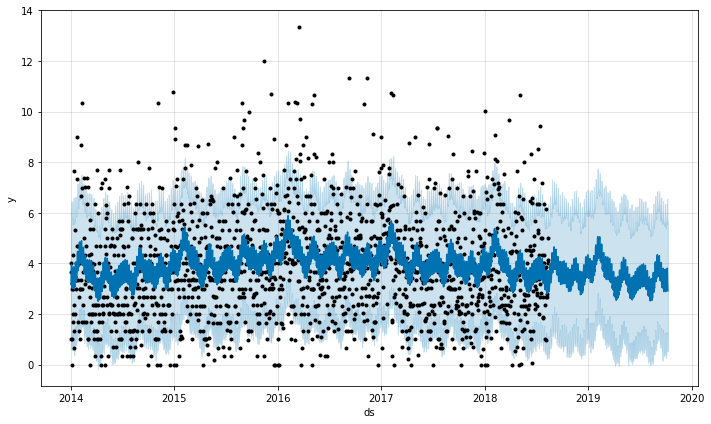

In [58]:
# plot prediction
model_m01ae_fb.plot(baseline_prediction2)
plt.plot()

In [59]:
m01ae_fb.set_index('ds', inplace=True)
baseline_prediction2.set_index('ds', inplace=True)

In [60]:
viz_df2 = m01ae_fb.join(baseline_prediction2[['yhat', 'yhat_lower','yhat_upper']], how ='outer')
viz_df2.head()

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2014-01-02,3.67,3.169724,0.609111,6.013676
2014-01-03,4.00,3.290277,0.762296,5.870226
2014-01-04,1.00,3.935911,1.319164,6.314003
2014-01-05,3.00,3.957105,1.216342,6.463779
2014-01-06,1.00,3.254080,0.662605,5.865977


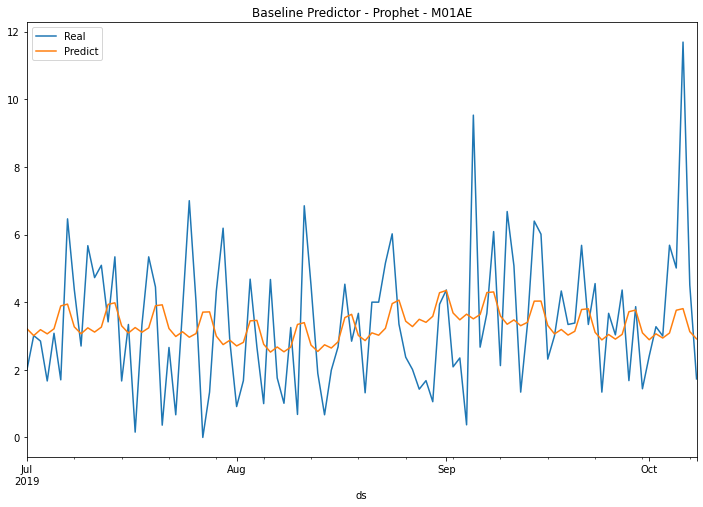

In [61]:
# see last 100 observations 
viz_df2.rename(columns={'y':'Real', 'yhat':'Predict'}, inplace=True)
viz_df2[['Real', 'Predict']].iloc[-100:,:].plot().get_figure()
plt.title('Baseline Predictor - Prophet - M01AE')
plt.show()

In [62]:
# Create dataframe to evaluate the model
comp_baseline2 = m01ae_fb_test.merge(baseline_prediction2[['yhat']], how ='left', left_on='ds', right_index=True).set_index('ds')
comp_baseline2.tail(5)

,y,yhat
ds,,
2019-10-04,5.683,3.087658
2019-10-05,5.010,3.761015
2019-10-06,11.690,3.808457
2019-10-07,4.507,3.128688
2019-10-08,1.730,2.915135


In [63]:
# Evaluate Model
MSE_2 = mean_squared_error(comp_baseline2['y'], comp_baseline2['yhat'], squared=False)
MAE_2 = mean_absolute_error(comp_baseline2['y'], comp_baseline2['yhat'])
MAPE_2 = np.abs(np.mean(((comp_baseline2['yhat']+1) - (comp_baseline2['y']+1)) / (comp_baseline2['y']+1)))

comp_baseline2_1 = comp_baseline2[comp_baseline2['y'] != 0]
MAPE2_2 = np.abs(np.mean((comp_baseline2_1['yhat'] - comp_baseline2_1['y']) / comp_baseline2_1['y'])) # MAPE for non-null values

print('Prophet Baseline - M01AE')
print('MSE: {} \nMAE: {} \nMAPE: {}'.format(MSE_2, MAE_2, MAPE2_2))

Prophet Baseline - M01AE
MSE: 2.1889968006570846 
MAE: 1.6627521052541772 
MAPE: 0.6037830993065818


In [64]:
results_table = pd.DataFrame([[MSE, MAE, '{:,.2%}'.format(MAPE2)],[MSE_2, MAE_2, '{:,.2%}'.format(MAPE2_2)]], 
                             index=['Prophet - M01AB', 'Prophet - M01AE'], columns=['MSE', 'MAE', 'MAPE'])
results_table

,MSE,MAE,MAPE
Prophet - M01AB,2.901028,2.250923,21.78%
Prophet - M01AE,2.188997,1.662752,60.38%


# ARIMA + SARIMA

### M01AB
- M01AB is stationary in the first difference and has positive skewness

In [65]:
np.log(m01ab+1).head(5)

,M01AB
date,
2014-01-02,0.000000
2014-01-03,2.197225
2014-01-04,1.098612
2014-01-05,1.609438
2014-01-06,1.791759


In [66]:
m01ab.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2014-01-02 to 2019-10-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M01AB   2106 non-null   float64
dtypes: float64(1)
memory usage: 32.9 KB


In [67]:
# train - test split
index = int(len(m01ab.index)*0.8)
log_m01ab = np.log(m01ab+1)
log_m01ab_train = log_m01ab.iloc[:index,:]
log_m01ab_test = log_m01ab.iloc[index:,:]
print("Train: {} | Test: {}".format(log_m01ab_train.shape, log_m01ab_test.shape))

Train: (1684, 1) | Test: (422, 1)


In [68]:
# auto-arima for ARIMA model
log_m01ab_fit = pm.auto_arima(log_m01ab_train, start_p=1, start_q=1,max_p=10, max_q=10,
seasonal=False,d=1, trace=True, error_action='ignore', # don't want to know if an order does not work
suppress_warnings=True, # don't want convergence warnings
stepwise=True) # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2512.296, Time=2.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3612.491, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3195.570, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2510.744, Time=1.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3610.498, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2512.255, Time=1.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2514.271, Time=1.46 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2508.827, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2510.384, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2510.344, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3193.577, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2512.354, Time=0.37 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 8.816 seconds


In [69]:
# output of best arima model
print(log_m01ab_fit.summary())
# validade previous Ljung-Box test
print(sm.stats.diagnostic.acorr_ljungbox(log_m01ab_fit.resid(), lags=[7], return_df=True))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1684
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1252.413
Date:                Tue, 15 Jun 2021   AIC                           2508.827
Time:                        19:26:12   BIC                           2519.683
Sample:                             0   HQIC                          2512.848
                               - 1684                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9838      0.005   -212.746      0.000      -0.993      -0.975
sigma2         0.2588      0.007     35.041      0.000       0.244       0.273
Ljung-Box (Q):                       67.06   Jarque-

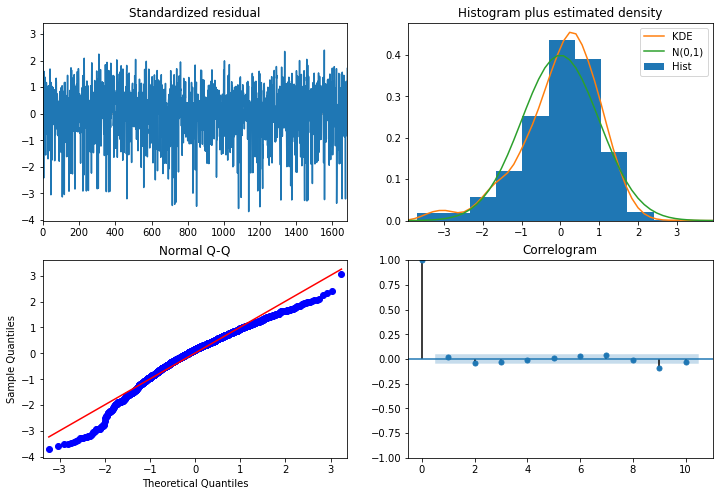

In [70]:
# residuals analysis - overall
log_m01ab_fit.plot_diagnostics()
plt.show()

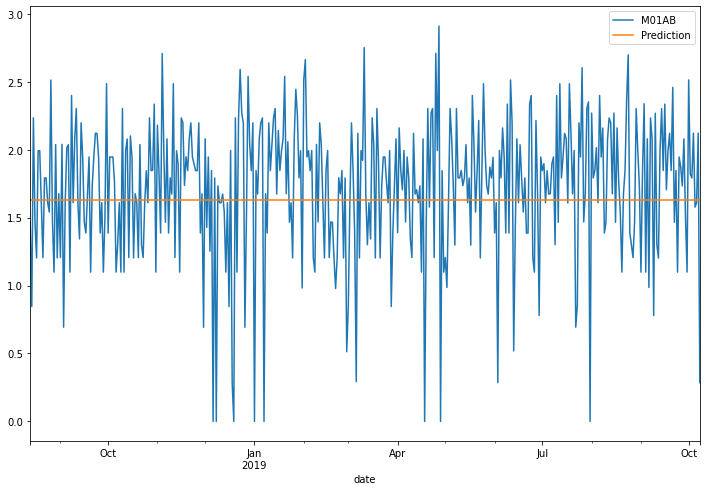

In [71]:
# out-of-sample forecast
m01ab_arima_for = log_m01ab_fit.predict(n_periods=len(log_m01ab_test.index))

# join the forecasted value and the test set values in the same dataframe and plot both

m01ab_arima_for = pd.DataFrame(m01ab_arima_for,index = log_m01ab_test.index,columns=['Prediction'])
pd.concat([log_m01ab_test,m01ab_arima_for],axis=1).plot()
plt.show()

In [72]:
# Evaluate Model
results_arima = np.exp(pd.concat([log_m01ab_test,m01ab_arima_for],axis=1)-1)
results_arima.tail(15)

,M01AB,Prediction
date,,
2019-09-24,1.103638,1.882786
2019-09-25,2.575156,1.882786
2019-09-26,2.391216,1.882786
2019-09-27,2.082198,1.882786
2019-09-28,2.943036,1.882786
2019-09-29,1.659136,1.882786
2019-09-30,1.103638,1.882786
2019-10-01,4.539632,1.882786
2019-10-02,2.273495,1.882786


In [73]:
MSE_arima = mean_squared_error(results_arima['M01AB'], results_arima['Prediction'], squared=False)
MAE_arima = mean_absolute_error(results_arima['M01AB'], results_arima['Prediction'])

results_arima_non_null = results_arima[results_arima['M01AB'] != 0]
MAPE_arima = np.abs(np.mean((results_arima_non_null['Prediction'] - results_arima_non_null['M01AB']) / results_arima_non_null['M01AB'])) # MAPE for non-null values

print('ARIMA - M01AE')
print('MSE: {} \nMAE: {} \nMAPE: {}'.format(MSE_arima, MAE_arima, MAPE_arima))

ARIMA - M01AE
MSE: 1.1118784467549936 
MAE: 0.84766564395539 
MAPE: 0.06761088384133583


In [74]:
# SARIMA

# Define the parameters p and q to take any value between 0 and 8
q = p = range(4, 8)
# Define the d parameters to take any value between 1 and 2
d = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(range(0,2), range(0,1), range(0,2)))]

# auto-sarimax loop

warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod2 = sm.tsa.statespace.SARIMAX(log_m01ab_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod2.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [75]:
# print best model
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 2459.0422417666373 for model SARIMAX(4, 1, 4)x(0, 0, 1, 12)


In [160]:
# The model that minimizes AIC criteria doen't respect all residual's assumptions, therefore the closest model that respect
# the needed assumptions is chosen
log_m01ab_fit2 = sm.tsa.statespace.SARIMAX(log_m01ab_train,order=(6,1,4),seasonal_order=(0,0,1,12), enforce_stationarity=False, enforce_invertibility=False)
log_m01ab_fit_sarima = log_m01ab_fit2.fit()

In [161]:
# output of best sarimax model
print(log_m01ab_fit_sarima.summary())
# validade previous Ljung-Box test
print(sm.stats.diagnostic.acorr_ljungbox(log_m01ab_fit_sarima.resid, lags=[6], return_df=True))

                                      SARIMAX Results                                       
Dep. Variable:                                M01AB   No. Observations:                 1684
Model:             SARIMAX(6, 1, 4)x(0, 0, [1], 12)   Log Likelihood               -1228.080
Date:                              Tue, 15 Jun 2021   AIC                           2480.160
Time:                                      22:22:52   BIC                           2545.178
Sample:                                  01-02-2014   HQIC                          2504.255
                                       - 08-12-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2054      2.136     -0.096      0.923      -4.391       3.981
ar.L2         -0.56

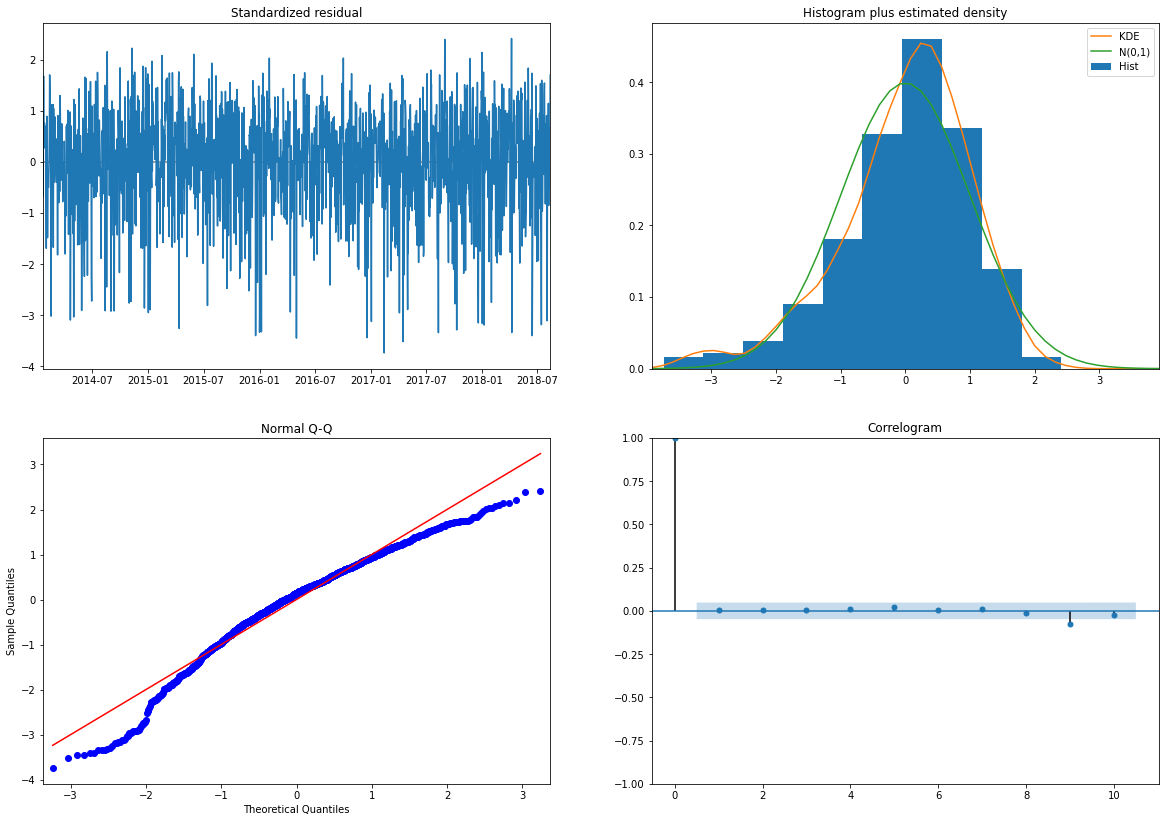

In [162]:
# visual check for residuals
log_m01ab_fit_sarima.plot_diagnostics(figsize=(20, 14))
plt.show()

In [163]:
# out-of-sample forecast
pred_sarima = log_m01ab_fit_sarima.get_forecast('2019-10-08')
pred_sarima_ci = log_m01ab_fit_sarima.conf_int()
print(pred_sarima.predicted_mean)

2018-08-13    1.628271
2018-08-14    1.595959
2018-08-15    1.586017
2018-08-16    1.621830
2018-08-17    1.610414
                ...   
2019-10-04    1.627817
2019-10-05    1.627817
2019-10-06    1.627817
2019-10-07    1.627817
2019-10-08    1.627817
Freq: D, Length: 422, dtype: float64


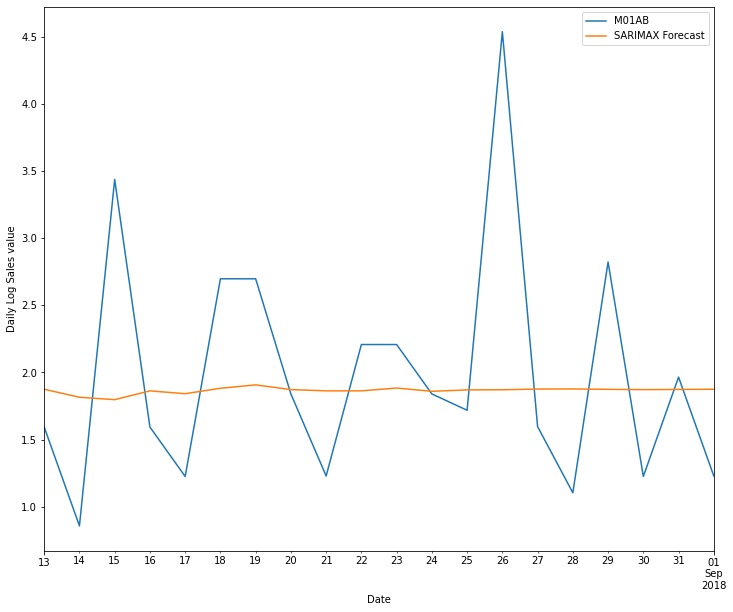

In [164]:
# plot all predictions in the same picture
ax = np.exp(log_m01ab_test-1)[:20].plot(figsize=(12, 10))
np.exp(pred_sarima.predicted_mean-1)[:20].plot(ax=ax, label='SARIMAX Forecast')
plt.ylabel('Daily Log Sales value')
plt.xlabel('Date')
plt.legend()

In [165]:
# Evaluate Model
results_sarima = np.exp(pd.concat([log_m01ab_test,pred_sarima.predicted_mean],axis=1)-1)
results_sarima.rename(columns={0:'Prediction'}, inplace=True)
results_sarima.head(15)

,M01AB,Prediction
2018-08-13,1.592918,1.874368
2018-08-14,0.857159,1.814770
2018-08-15,3.435994,1.796818
2018-08-16,1.592918,1.862332
2018-08-17,1.225039,1.841194
2018-08-18,2.696556,1.881658
2018-08-19,2.696556,1.906879
2018-08-20,1.839397,1.871759
2018-08-21,1.228717,1.862495
2018-08-22,2.207277,1.862403


In [166]:
MSE_sarima = mean_squared_error(results_sarima['M01AB'], results_sarima['Prediction'], squared=False)
MAE_sarima = mean_absolute_error(results_sarima['M01AB'], results_sarima['Prediction'])

results_sarima_non_null = results_sarima[results_sarima['M01AB'] != 0]
MAPE_sarima = np.abs(np.mean((results_sarima_non_null['Prediction'] - results_sarima_non_null['M01AB']) / results_sarima_non_null['M01AB'])) # MAPE for non-null values

print('SARIMA - M01AE')
print('MSE: {} \nMAE: {} \nMAPE: {}'.format(MSE_sarima, MAE_sarima, MAPE_sarima))

SARIMA - M01AE
MSE: 1.115441627874384 
MAE: 0.8496911926665285 
MAPE: 0.0620536101081144


### M01AE
- M01AE is stationary in level and has positive skewness

In [94]:
np.log(m01ae+1).head(5)

,M01AE
date,
2014-01-02,1.541159
2014-01-03,1.609438
2014-01-04,0.693147
2014-01-05,1.386294
2014-01-06,0.693147


In [99]:
# train - test split
index = int(len(m01ae.index)*0.8)
log_m01ae = np.log(m01ae+1)
log_m01ae_train = log_m01ae.iloc[:index,:]
log_m01ae_test = log_m01ae.iloc[index:,:]
print("Train: {} | Test: {}".format(log_m01ae_train.shape, log_m01ae_test.shape))

Train: (1684, 1) | Test: (422, 1)


In [100]:
# auto-arima for ARIMA model
log_m01ae_fit = pm.auto_arima(log_m01ae_train, start_p=1, start_q=1,max_p=10, max_q=10,
seasonal=False,d=0, trace=True, error_action='ignore', # don't want to know if an order does not work
suppress_warnings=True, # don't want convergence warnings
stepwise=True) # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2264.901, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6285.937, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3316.734, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5080.061, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2266.804, Time=2.40 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2266.803, Time=0.81 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4454.302, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2895.591, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2272.925, Time=1.73 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 7.391 seconds


In [101]:
# output of best arima model
print(log_m01ae_fit.summary())
# validade previous Ljung-Box test
print(sm.stats.diagnostic.acorr_ljungbox(log_m01ae_fit.resid(), lags=[1], return_df=True))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1684
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1129.450
Date:                Tue, 15 Jun 2021   AIC                           2264.901
Time:                        20:03:41   BIC                           2281.187
Sample:                             0   HQIC                          2270.933
                               - 1684                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   3.13e-05   3.19e+04      0.000       1.000       1.000
ma.L1         -0.9879      0.004   -251.831      0.000      -0.996      -0.980
sigma2         0.2231      0.007     33.051      0.0

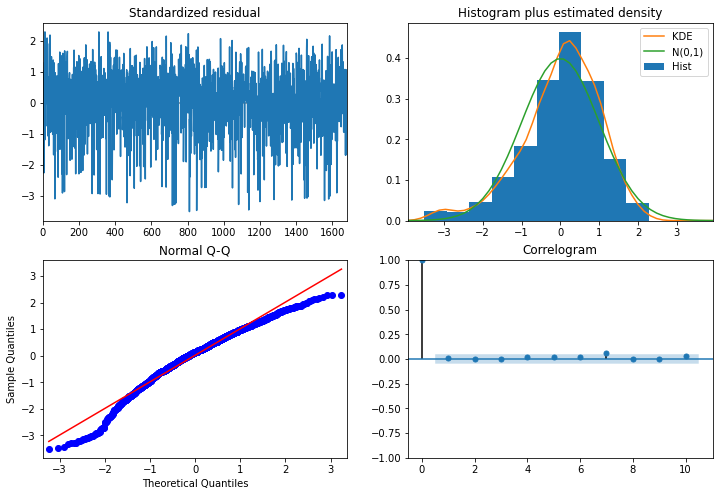

In [102]:
# residuals analysis - overall
log_m01ae_fit.plot_diagnostics()
plt.show()

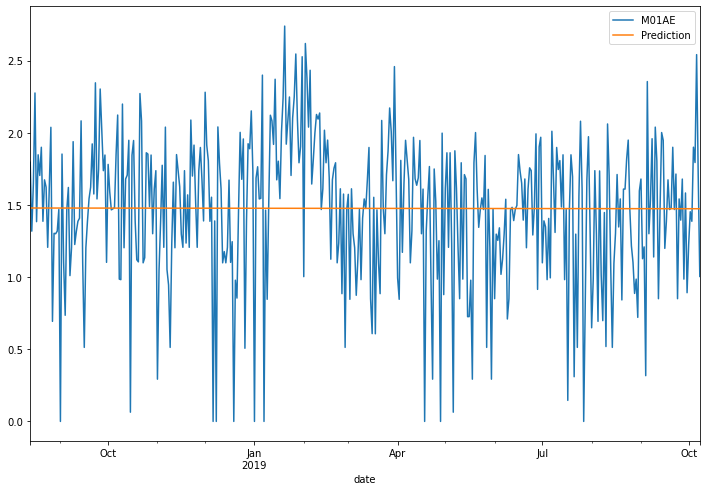

In [103]:
# out-of-sample forecast
m01ae_arima_for = log_m01ae_fit.predict(n_periods=len(log_m01ae_test.index))

# join the forecasted value and the gdp_test values in the same dataframe and plot both

m01ae_arima_for = pd.DataFrame(m01ae_arima_for,index = log_m01ae_test.index,columns=['Prediction'])
pd.concat([log_m01ae_test,m01ae_arima_for],axis=1).plot()
plt.show()

In [107]:
# Evaluate Model
results_arima2 = np.exp(pd.concat([log_m01ae_test,m01ae_arima_for],axis=1)-1)
np.exp(results_arima2-1).head(15)

,M01AE,Prediction
date,,
2018-08-13,3.369062,1.846432
2018-08-14,1.454115,1.846397
2018-08-15,2.490803,1.846362
2018-08-16,13.185254,1.846327
2018-08-17,1.596540,1.846292
2018-08-18,3.789961,1.846258
2018-08-19,2.777351,1.846223
2018-08-20,4.294927,1.846188
2018-08-21,1.602424,1.846153


In [109]:
MSE_arima2 = mean_squared_error(results_arima2['M01AE'], results_arima2['Prediction'], squared=False)
MAE_arima2 = mean_absolute_error(results_arima2['M01AE'], results_arima2['Prediction'])

results_arima_non_null2 = results_arima2[results_arima2['M01AE'] != 0]
MAPE_arima2 = np.abs(np.mean((results_arima_non_null2['Prediction'] - results_arima_non_null2['M01AE']) / results_arima_non_null2['M01AE'])) # MAPE for non-null values

print('ARIMA - M01AE')
print('MSE: {} \nMAE: {} \nMAPE: {}'.format(MSE_arima2, MAE_arima2, MAPE_arima2))

ARIMA - M01AE
MSE: 0.8495736664430912 
MAE: 0.6371473080953024 
MAPE: 0.16956126360121104


In [112]:
# SARIMA

# Define the parameters p and q to take any value between 0 and 8
q = p = range(0, 8)
# Define the d parameters to take any value between 1 and 2
d = range(0, 1)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(range(0,2), range(0,1), range(0,2)))]

# auto-sarimax loop

warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod2 = sm.tsa.statespace.SARIMAX(log_m01ae_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod2.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [113]:
# print best model
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 2235.2868873521147 for model SARIMAX(1, 0, 1)x(0, 0, 1, 12)


In [130]:
# use the model that minimizes AIC criteria
log_m01ae_fit2 = sm.tsa.statespace.SARIMAX(log_m01ae_train,order=(1,0,1),seasonal_order=(0,0,1,12), enforce_stationarity=False, enforce_invertibility=False)
log_m01ae_fit_sarima = log_m01ae_fit2.fit()

In [131]:
# output of best sarimax model
print(log_m01ae_fit_sarima.summary())
# validade previous Ljung-Box test
print(sm.stats.diagnostic.acorr_ljungbox(log_m01ae_fit_sarima.resid, lags=[1], return_df=True))

                                     SARIMAX Results                                      
Dep. Variable:                              M01AE   No. Observations:                 1684
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood               -1113.643
Date:                            Tue, 15 Jun 2021   AIC                           2235.287
Time:                                    22:11:00   BIC                           2256.969
Sample:                                01-02-2014   HQIC                          2243.321
                                     - 08-12-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   7838.533      0.000       1.000       1.000
ma.L1         -0.9854      0.004   

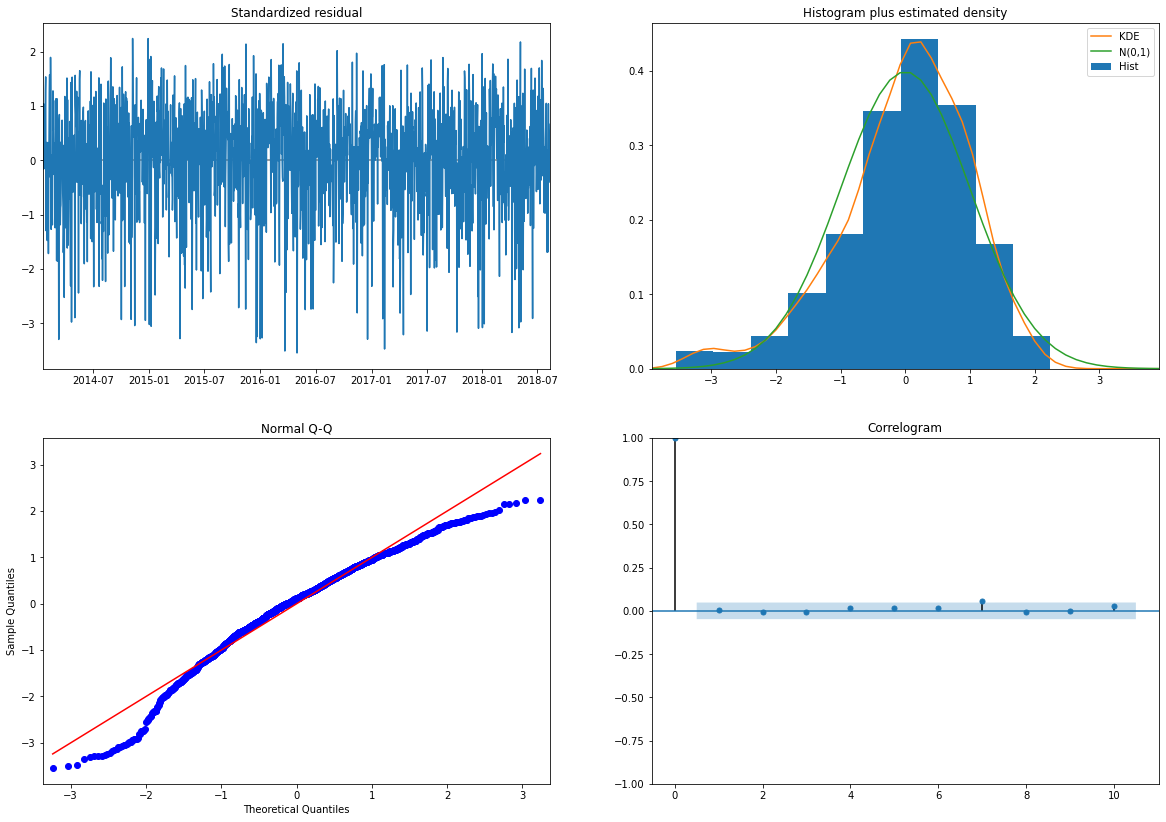

In [132]:
# visual check for residuals
log_m01ae_fit_sarima.plot_diagnostics(figsize=(20, 14))
plt.show()

In [133]:
# out-of-sample forecast
pred_sarima2 = log_m01ae_fit_sarima.get_forecast('2019-10-08')
pred_sarima_ci2 = log_m01ae_fit_sarima.conf_int()
print(pred_sarima2.predicted_mean)

2018-08-13    1.491162
2018-08-14    1.505531
2018-08-15    1.488902
2018-08-16    1.481606
2018-08-17    1.505818
                ...   
2019-10-04    1.486844
2019-10-05    1.486851
2019-10-06    1.486858
2019-10-07    1.486865
2019-10-08    1.486872
Freq: D, Length: 422, dtype: float64


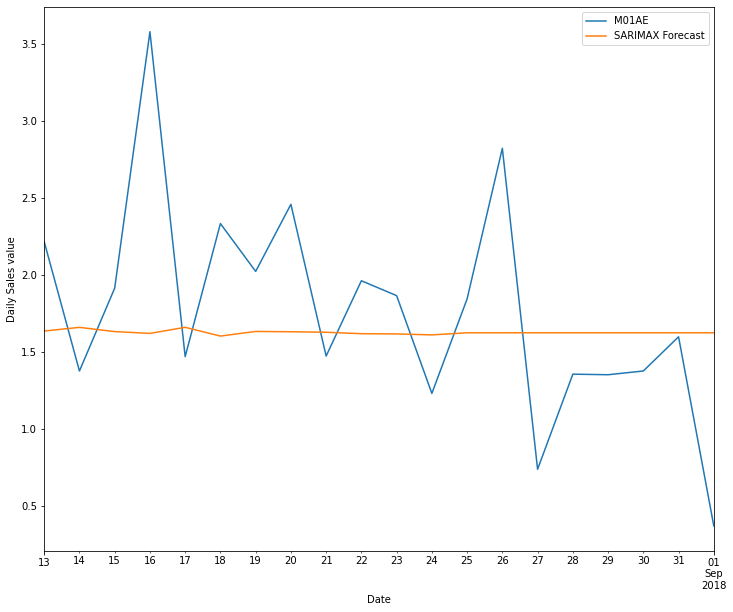

In [134]:
# plot all predictions in the same picture
ax = np.exp(log_m01ae_test-1)[:20].plot(figsize=(12, 10))
np.exp(pred_sarima2.predicted_mean-1)[:20].plot(ax=ax, label='SARIMAX Forecast')
plt.ylabel('Daily Sales value')
plt.xlabel('Date')
plt.legend()

In [135]:
# Evaluate Model
results_sarima2 = np.exp(pd.concat([log_m01ae_test,pred_sarima2.predicted_mean],axis=1)-1)
results_sarima2.rename(columns={0:'Prediction'}, inplace=True)
results_sarima2.head(15)

,M01AE,Prediction
2018-08-13,2.214634,1.634214
2018-08-14,1.374398,1.657865
2018-08-15,1.912605,1.630525
2018-08-16,3.579099,1.618672
2018-08-17,1.467839,1.658342
2018-08-18,2.332356,1.601285
2018-08-19,2.021498,1.631375
2018-08-20,2.457435,1.629348
2018-08-21,1.471518,1.626087
2018-08-22,1.960797,1.616799


In [136]:
MSE_sarima2 = mean_squared_error(results_sarima2['M01AE'], results_sarima2['Prediction'], squared=False)
MAE_sarima2 = mean_absolute_error(results_sarima2['M01AE'], results_sarima2['Prediction'])

results_sarima_non_null2 = results_sarima2[results_sarima2['M01AE'] != 0]
MAPE_sarima2 = np.abs(np.mean((results_sarima_non_null2['Prediction'] - results_sarima_non_null2['M01AE']) / results_sarima_non_null2['M01AE'])) # MAPE for non-null values

print('SARIMA - M01AE')
print('MSE: {} \nMAE: {} \nMAPE: {}'.format(MSE_sarima2, MAE_sarima2, MAPE_sarima2))

SARIMA - M01AE
MSE: 0.8469995480445885 
MAE: 0.6368491793563399 
MAPE: 0.18109665341555586
